# Project Name :Trip Pricing with Taxi Mobility Analytics


![picture](https://drive.google.com/uc?export=view&id=1yTMgRrwyvbR7iVStiPVQJ6c7q2bbep0T)


# BUSINESS PROBLEM
Data provided by an Indian cab aggregator service Sigma Cabs. Their customers can download their app on smartphones and book a cab from any where in the cities they operate in. They, in turn search for cabs from various service providers and provide the best option to their client across available options. They have been in operation for little less than a year now. During this period, they have captured surgepricingtype from the service providers.

# OBJECTIVE

The main objective is to build a predictive model, which could help them in predicting the surgepricingtype pro-actively(MULTICLASSIFICATION). This would in turn help them in matching the right cabs with the right customers quickly and efficiently.

# **Lifecycle in the project**
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings("ignore")

plt.rcParams["figure.figsize"]=[10,5]

pd.options.display.max_rows=None
pd.options.display.max_columns=None

In [ ]:
# Reading train dataset
df_train = pd.read_csv('sigma_cabs.csv')

In [ ]:
# Reading train dataset
df_test=pd.read_csv("test.csv")

In [ ]:
# Get the number of rows and columns of the dataset
print("Train dataset contains {} rows and {} columns".format(df_train.shape[0],df_train.shape[1]))


Train dataset contains 131662 rows and 14 columns


In [ ]:
# Get the number of rows and columns of the dataset
print("Test dataset contains {} rows and {} columns".format(df_test.shape[0],df_test.shape[1]))


Test dataset contains 87395 rows and 13 columns


# column Descriptions
Trip_ID: ID for TRIP

Trip_Distance: The distance for the trip requested by the customer

TypeofCab: Category of the cab requested by the customer

CustomerSinceMonths: Customer using cab services since n months; 0 month means current month

LifeStyleIndex: Proprietary index created by Sigma Cabs showing lifestyle of the customer based on their behaviour
                (Proprietary Index means a designated group of securities or instruments that (i) measures or represents the performance of a specific segment of the market for U.S.)

ConfidenceLifeStyle_Index: Category showing confidence on the index mentioned above

Destination_Type: Sigma Cabs divides any destination in one of the 14 categories.

Customer_Rating: Average of life time ratings of the customer till date

CancellationLast1Month: Number of trips cancelled by the customer in last 1 month

Var1, Var2 and Var3: Continuous variables masked by the company. Can be used for modelling purposes

Gender: Gender of the customer

SurgePricingType: Target (can be of 3 types)

In [ ]:
# Displying the top 5 rows in train data
df_train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [ ]:
# Displying the top 5 rows in test data
df_test.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,T0005689459,9.44,A,10.0,2.57438,A,B,3.68000,2,NaN,46,63,Male
1,T0005689462,32.15,B,10.0,2.85143,A,A,1.59375,0,65.0,49,80,Female
2,T0005689463,10.38,C,4.0,2.70530,A,D,4.50500,0,NaN,47,74,Male
3,T0005689466,14.94,NaN,6.0,2.48159,C,E,4.53000,0,63.0,43,54,Male
4,T0005689468,32.03,B,7.0,2.81598,A,K,4.60125,3,96.0,44,56,Male


In [ ]:
# Get the information of columns in train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [ ]:
# Get the information of columns in test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87395 entries, 0 to 87394
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Trip_ID                      87395 non-null  object 
 1   Trip_Distance                87395 non-null  float64
 2   Type_of_Cab                  74237 non-null  object 
 3   Customer_Since_Months        83429 non-null  float64
 4   Life_Style_Index             74068 non-null  float64
 5   Confidence_Life_Style_Index  74068 non-null  object 
 6   Destination_Type             87395 non-null  object 
 7   Customer_Rating              87395 non-null  float64
 8   Cancellation_Last_1Month     87395 non-null  int64  
 9   Var1                         40606 non-null  float64
 10  Var2                         87395 non-null  int64  
 11  Var3                         87395 non-null  int64  
 12  Gender                       87395 non-null  object 
dtypes: float64(5), i

 ***Inference***

* Here we can see the some columns having missing values.
* Here Customer_Since_Months ,given as past 11 month unique discrete data 
* Cancellation last 1 month is having 9 unique discrete data.
* so we are converting  into int as month can not be in float,after treating null values.

# **Data Analysis**


# **Treating the missing values**

 1. Continuous
  - Between 0% to 5% ----> Drop rows 
  - Between 5% to 25% ----> impute with mean or median.
  - Between 25% to 50% ----> impute with bfill or ffill or predictive approach.
  - Between 50% to 100% ---> Drop columns
 2. Categorical
  - Between 00% to 05% ----> Drop rows 
  - Between 05% to 25% ----> impute with Mode 
  - Between 25% to 50% ----> Create New Category "NA" or Drop 
  - Between 50% to 100% ---> Drop Columns

  * Not very critical for advanced algorithms 

In [ ]:
# Get the missing values for the whole train dataset
Missing_overall=df_train.isnull().sum()[df_train.isnull().sum()>0].sort_values(ascending=False)
Missing_overall

Var1                           71030
Type_of_Cab                    20210
Confidence_Life_Style_Index    20193
Life_Style_Index               20193
Customer_Since_Months           5920
dtype: int64

In [ ]:
# Get the missing values for the whole train dataset
Percent_missing_overall=(Missing_overall/df_train.shape[0])*100
Percent_missing_overall

Var1                           53.948748
Type_of_Cab                    15.349911
Confidence_Life_Style_Index    15.336999
Life_Style_Index               15.336999
Customer_Since_Months           4.496362
dtype: float64

In [ ]:
# Get the missing values for the whole test dataset
Missing_overall=df_test.isnull().sum()[df_test.isnull().sum()>0].sort_values(ascending=False)
Missing_overall

Var1                           46789
Confidence_Life_Style_Index    13327
Life_Style_Index               13327
Type_of_Cab                    13158
Customer_Since_Months           3966
dtype: int64

In [ ]:
# Get the missing values for the whole test dataset
Percent_missing_overall=(Missing_overall/df_test.shape[0])*100
Percent_missing_overall

Var1                           53.537388
Confidence_Life_Style_Index    15.249156
Life_Style_Index               15.249156
Type_of_Cab                    15.055781
Customer_Since_Months           4.538017
dtype: float64

***Inference***

* 5 columns having null values -Var1,Type_of_cab,Life_style_index,confidence_life_style_index,customer_since_months.
* Type of cab is having 15% of null values,If we replace the category column with the most frequency then it leads to error.
* Becase type of cab is a preference based on the surge_price_type.
* so we are spliiting the dataset according to their surge_price_type and doing imputation.

# Segregating into 3 dataframes to impute null values according surgepricetype category

# Handling missing values in train data

In [ ]:
s1 = df_train[df_train['Surge_Pricing_Type']==1]
s2 = df_train[df_train['Surge_Pricing_Type']==2]
s3 = df_train[df_train['Surge_Pricing_Type']==3]

In [ ]:
# Finding the null values of each surgepricetype
n=1
for i in [s1,s2,s3]:
  print("Surge",n)
  Missing=i.isnull().sum()[i.isnull().sum()>0].sort_values(ascending=False)
  Percent_missing_1=(Missing/i.shape[0])*100
  print(pd.DataFrame({"Missing_values":Missing,"Percent_missing":Percent_missing_1}))
  print(" ")
  print(" ")
  n+=1

Surge 1
                             Missing_values  Percent_missing
Var1                                  17915        65.830087
Type_of_Cab                            4205        15.451606
Confidence_Life_Style_Index            4176        15.345043
Life_Style_Index                       4176        15.345043
Customer_Since_Months                  1147         4.214742
 
 
Surge 2
                             Missing_values  Percent_missing
Var1                                  29740        52.425610
Type_of_Cab                            8645        15.239388
Confidence_Life_Style_Index            8637        15.225286
Life_Style_Index                       8637        15.225286
Customer_Since_Months                  2540         4.477507
 
 
Surge 3
                             Missing_values  Percent_missing
Var1                                  23375        48.983655
Confidence_Life_Style_Index            7380        15.465214
Life_Style_Index                       7380        15

In [ ]:
# Var1 is above 50 % in all 3surge_types.
# Dropping the Var1

s1 = s1.drop(columns=['Var1'])
s2 = s2.drop(columns=['Var1'])
s3 = s3.drop(columns=['Var1'])


In [ ]:
# Type_of_Cab ,Confidence_Life_Style_Index ,Customer_since_months is having above 5% in all 3 surge_types
# Finding each surge_price_type most frquency.

n=1
for i in [s1,s2,s3]:
  print("Surge",n)
  mode=i["Type_of_Cab"].mode()[0]
  print("The most used type of cab is",mode)
  

  mode=i["Confidence_Life_Style_Index"].mode()[0]
  print("customer Confidence_Life_Style_Index  is",mode)
  

  mode=i["Customer_Since_Months"].mode()[0]
  print("Trusted Customer_Since_Months  is",mode)
  print(" ")
  n+=1

Surge 1
The most used type of cab is A
customer Confidence_Life_Style_Index  is A
Trusted Customer_Since_Months  is 10.0
 
Surge 2
The most used type of cab is B
customer Confidence_Life_Style_Index  is A
Trusted Customer_Since_Months  is 10.0
 
Surge 3
The most used type of cab is D
customer Confidence_Life_Style_Index  is B
Trusted Customer_Since_Months  is 10.0
 


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
# Filling with each surge_price_type most frquency.
sm = SimpleImputer(strategy='most_frequent')
data = sm.fit_transform(s1.select_dtypes('object'))
data2 = sm.fit_transform(s2.select_dtypes('object'))
data3 = sm.fit_transform(s3.select_dtypes('object'))


In [ ]:
## Life_Style_Index is having 15% of null values
## Filling with Mean it is not skewed (train dataset)

sm = SimpleImputer(strategy='mean')
data_num = sm.fit_transform(s1.select_dtypes('number'))
data_num1 = sm.fit_transform(s2.select_dtypes('number'))
data_num2 = sm.fit_transform(s3.select_dtypes('number'))

# Converting the above into dataframe

In [ ]:
data = pd.DataFrame(data,columns = s1.select_dtypes('object').columns)
data2 = pd.DataFrame(data2,columns = s2.select_dtypes('object').columns)
data3 = pd.DataFrame(data3,columns = s3.select_dtypes('object').columns)


In [ ]:
data_num = pd.DataFrame(data_num,columns = s1.select_dtypes('number').columns)
data_num1 = pd.DataFrame(data_num1,columns = s2.select_dtypes('number').columns)
data_num2 = pd.DataFrame(data_num2,columns = s3.select_dtypes('number').columns)


# Concating the numerical and categorical columns

In [ ]:
s1 = pd.concat([data,data_num],axis=1)
s2 = pd.concat([data2,data_num1],axis=1)
s3 = pd.concat([data3,data_num2],axis=1)


In [ ]:
df1_train = pd.concat([s1,s2,s3])

# Checking the data information

In [ ]:
df1_train.shape

(131662, 13)

In [ ]:
for i in ["Customer_Since_Months",'Cancellation_Last_1Month']:
  df1_train[i]=df1_train[i].astype('int')

In [ ]:
df1_train.isnull().sum()

Trip_ID                        0
Type_of_Cab                    0
Confidence_Life_Style_Index    0
Destination_Type               0
Gender                         0
Trip_Distance                  0
Customer_Since_Months          0
Life_Style_Index               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var2                           0
Var3                           0
Surge_Pricing_Type             0
dtype: int64

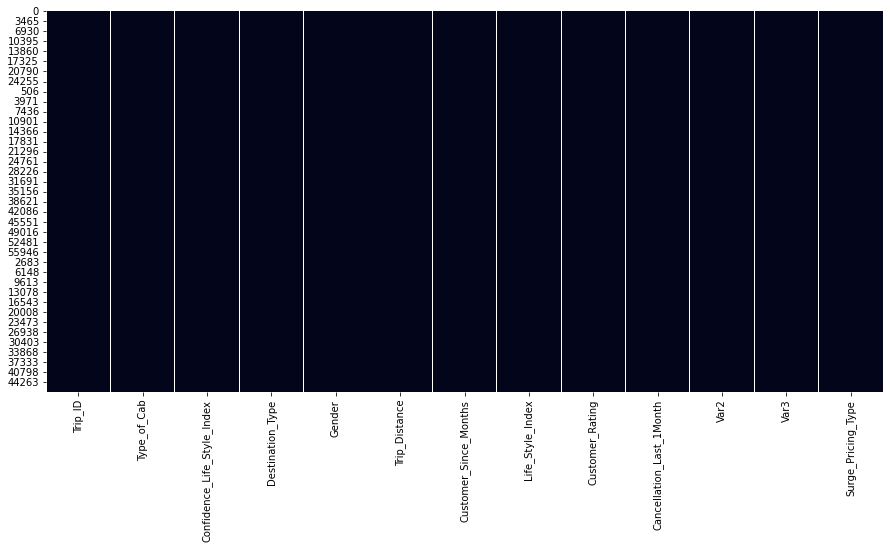

In [ ]:
plt.figure(figsize=[15,7])
sns.heatmap(df1_train.isnull(),cbar=False)
plt.show()

# Numerical and categorical features

In [ ]:
df1_train.drop(["Trip_ID"],axis=1,inplace=True)

***Inference***
* Trip id is not the valid column to taken into consideration while building model so drop the column

In [ ]:
num_features=df1_train.select_dtypes(include='number')
num_features.columns

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var2', 'Var3',
       'Surge_Pricing_Type'],
      dtype='object')

In [ ]:
cat_features=df1_train.select_dtypes(include="object")
cat_features.columns

Index(['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type',
       'Gender'],
      dtype='object')

# **Treating Outliers**

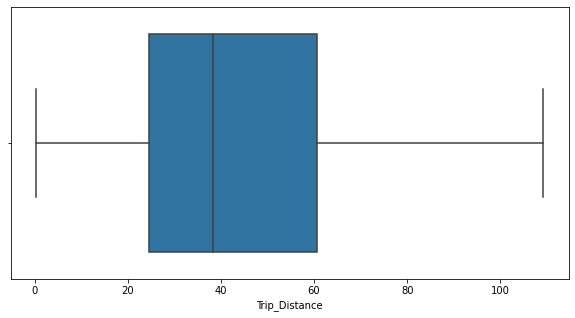

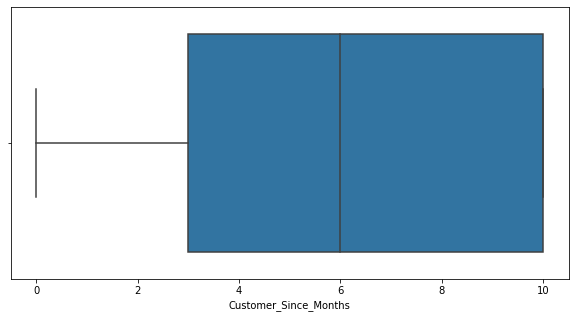

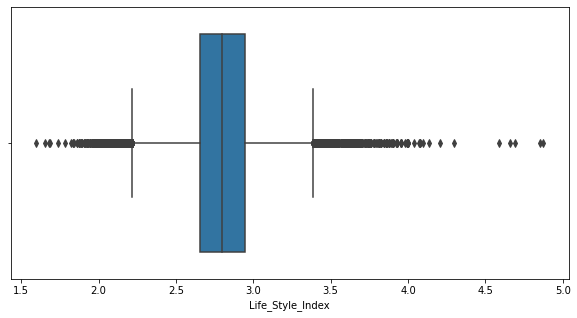

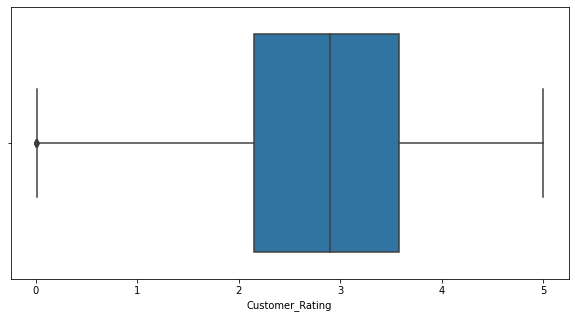

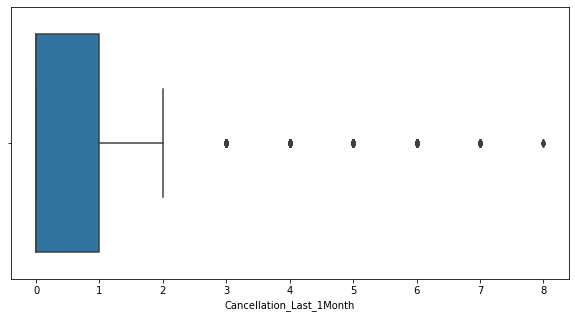

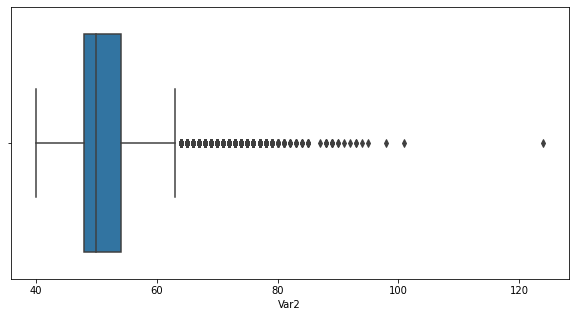

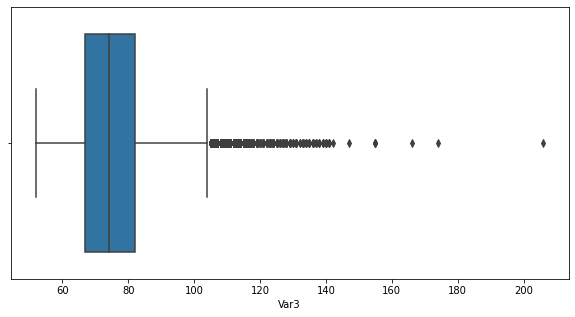

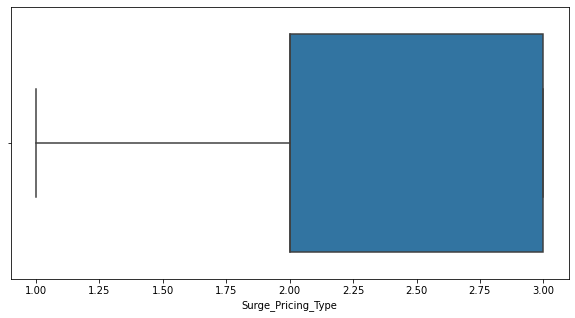

In [ ]:
for i in num_features.columns:
  sns.boxplot(df_train[i])
  plt.show()

 ***Inference***
 * As we saw there are some outliers present in our dataset.
 * I am not treating outliers since column outliers may be most important for classifying the customer behaviour, as some columns like lifestyleindex is derived and given by client so we are not treating it.





# **Univariant Analysis**

 ***categorical Features***

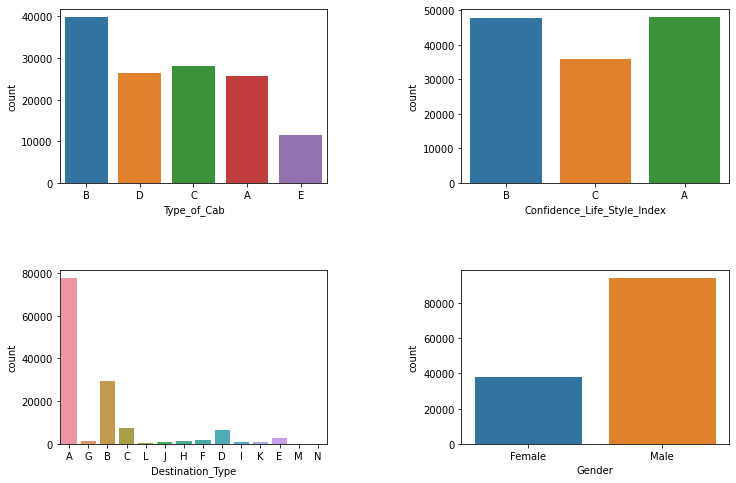

In [ ]:
cat_col=['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type','Gender']
fig,axes=plt.subplots(2,2,figsize=[12,8])
for indx,cat_col in enumerate(cat_col) :
  rows,columns=indx//2,indx%2
  sns.countplot(data=df1_train,x=cat_col,ax=axes[rows,columns])
plt.subplots_adjust(wspace=0.5,hspace=0.5)

**Inference**

1.Type_of_Cab
* Cab type "B" is most used or requested by passengers (customers) followed by "C","A","F","D" and "E".
2.Confidence_Life_Style_Index
* "A" type of the Customers are having a good behaviour and confidence with Cab drivers followed by "B","C".
3.Destination_Type
* As destination_type is divided into 14 parts, In that type "A" destintion count is more followed by "B","C","D","E","F","G","H","I","J","L","M" and "N".
4.Gender
* Cabs used by Male passengers are most than Female.

***Discrete Features***

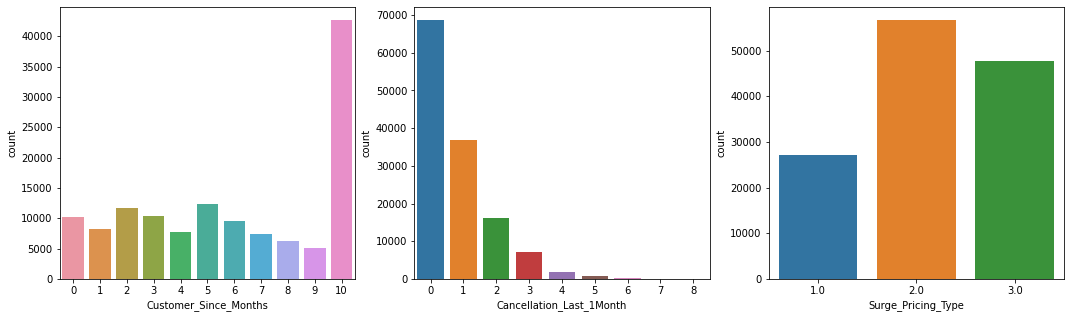

In [ ]:
dis_col=['Customer_Since_Months','Cancellation_Last_1Month','Surge_Pricing_Type']
fig,axes=plt.subplots(1,3,figsize=[18,5])
sns.countplot(data=df1_train,x=dis_col[0],ax=axes[0])
sns.countplot(data=df1_train,x=dis_col[1],ax=axes[1])
sns.countplot(data=df1_train,x=dis_col[2],ax=axes[2])

***Inference***

1. Customer_Since_Months
 * Customer using cab services since 10 months are more than other months.
2. Cancellation_Last_1Month
 * The customers didn't cancelled their trips as there are less cancellation since last 1 month.
3. Surge_Pricing_Type
 * Pricing Type "2" has most count followed by "3" and "1".


***Numerical Features***

In [ ]:
num_feat=['Trip_Distance','Life_Style_Index','var2','var3','Customer_Rating']

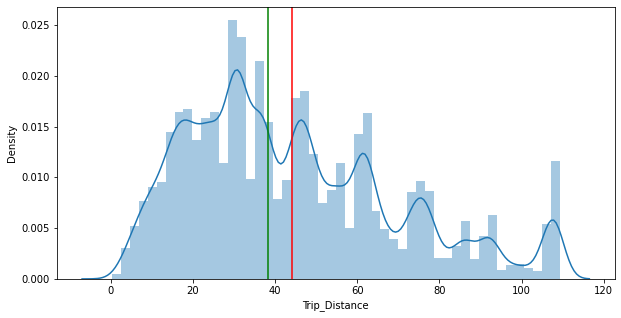

In [ ]:
sns.distplot(df1_train['Trip_Distance'])
plt.axvline(df1_train['Trip_Distance'].mean(),color="red")
plt.axvline(df1_train['Trip_Distance'].median(),color="green")
plt.show()

***Inference***

* Most of the passengers has travelled a distance of 25 to 35.
* Average distance travelled by the passengers is 45.

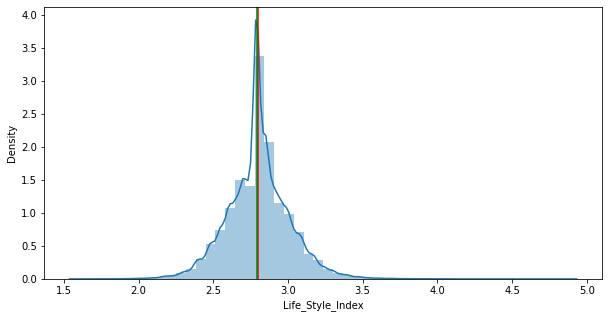

In [ ]:
sns.distplot(df1_train['Life_Style_Index'])
plt.axvline(df1_train['Life_Style_Index'].mean(),color="red")
plt.axvline(df1_train['Life_Style_Index'].median(),color="green")
plt.show()

***Inference***

* Mean life style index of the customer is 2.8

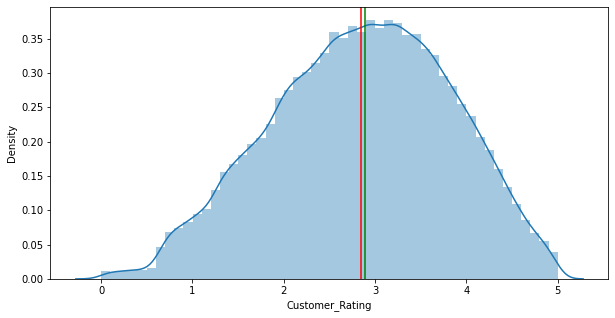

In [ ]:
sns.distplot(df1_train['Customer_Rating'])
plt.axvline(df1_train['Customer_Rating'].mean(),color="red")
plt.axvline(df1_train['Customer_Rating'].median(),color="green")
plt.show()


***Inference***
* Most of the customers gave rating between 2.5 and 3.5
* Average of life time ratings of the customer till date is around 2.8
* The distribution is somewhat left skewed.

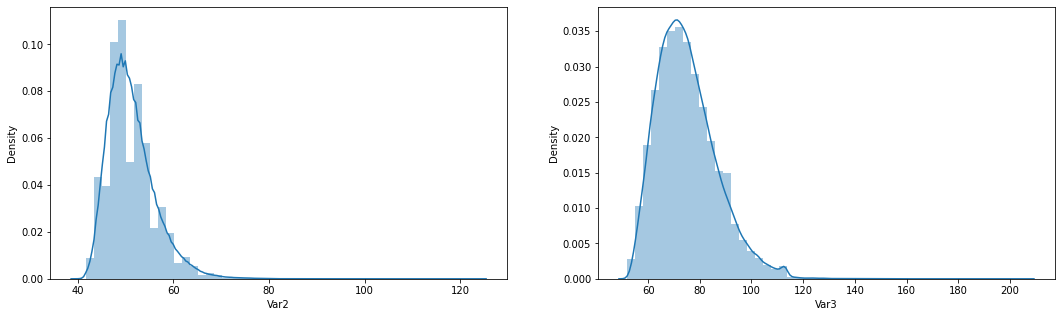

In [ ]:
fig,axes=plt.subplots(1,2,figsize=[18,5])
sns.distplot(df1_train['Var2'],ax=axes[0])
sns.distplot(df1_train['Var3'],ax=axes[1])
plt.show()

# **Bivariant Analysis**

***category columns and surge_pricing_type***

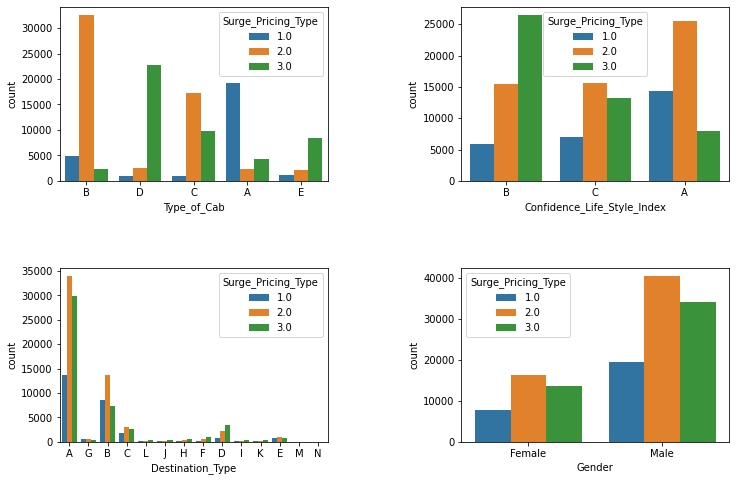

In [ ]:
cat_col=['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type','Gender']
fig,axes=plt.subplots(2,2,figsize=[12,8])
for indx,cat_col in enumerate(cat_col):
  rows,columns=indx//2,indx%2
  sns.countplot(data=df1_train,x=cat_col,hue=df1_train["Surge_Pricing_Type"],ax=axes[rows,columns])
plt.subplots_adjust(wspace=0.5,hspace=0.5)

***INFERENCE***

1.Type of cab and surge_pricing_type
* If we took Cab type "B" then almost pricing type will be "2" followed by "1"and "3".
* If we took Cab type "D" then almost pricing type will be "3" followed by "2"and "1".
* If we took Cab type "C" then almost pricing type will be "2" followed by "3"and "1".
* If we took Cab type "A" then almost pricing type will be "1" followed by "3"and "2".
* If we took Cab type "E" then almost pricing type will be "3" followed by "2"and "1".

2.Confidence_life_style index and surge_pricing_type
* If confidence_life_style_index is "B" then almost pricing type will be "3" folowed by "2" and "1".
* If confidence_life_style_index is "c" then almost pricing type will be "2" folowed by "3" and "1".
* If confidence_life_style_index is "A" then almost pricing type will be "2" folowed by "1" and "3".

3.Destination_type and Surge_pricing_type
* There are 14 destination_types from "A TO N"
* Destination type A and B is mostly used by customers.
* In Destination_type "A" pricing type is almost "2" followed by "3" and "1".
* In Destination_type "B" pricing type is almost "2" followed by "1" and "3".
* In Destination_type "D" pricing type is almost "2" followed by "3" and "1".
* In Destination_type "C" pricing type is almost "2" followed by "3" and "1".
* In Destination_type "G" pricing type is almost "2" followed by "3" and "1".
* In Destination_type "E" pricing type is almost equal.

4.Gender and Surge_pricing_type
* Male customers are more than female
* If the customer is "male" then almost pricing type is "2" followed by "3" and "1".
* If the customer is "female" then almost pricing type is "2" followed by "3" and"1".
 
 
 
 







 


***Discrete columns and surge_pricing_type***

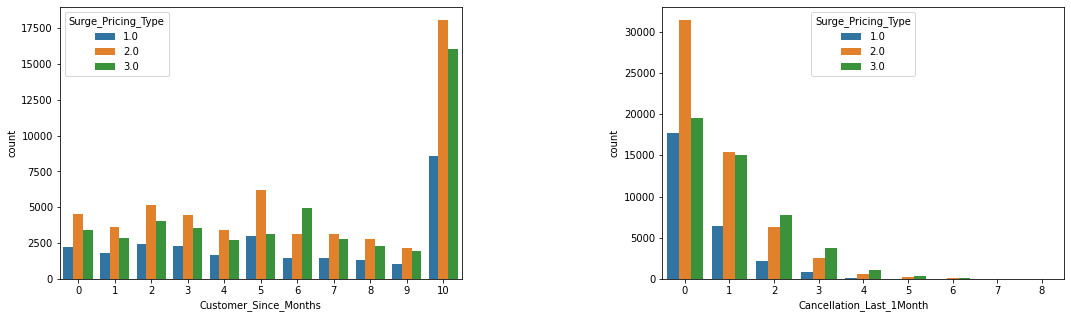

In [ ]:
dis_col=['Customer_Since_Months','Cancellation_Last_1Month','Surge_Pricing_Type']
fig,axes=plt.subplots(1,2,figsize=[18,5])
sns.countplot(x=dis_col[0],data=df1_train,hue=dis_col[2],ax=axes[0])
sns.countplot(x=dis_col[1],data=df1_train,hue=dis_col[2],ax=axes[1])
plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.show()

***Inference***

1.Customer_since_months and surge_pricing_type
* The customers are using cabs for past 11 months, "0" indicates the current month customer.
* All the customers for past 11 months almost prefers to use pricing type "2".

2.Cancellation last_1month
* Most of the times pricing type is "2" followed by "1" and "3"
* If the cancellation of the trip are more than "1" then pricing type is "3".

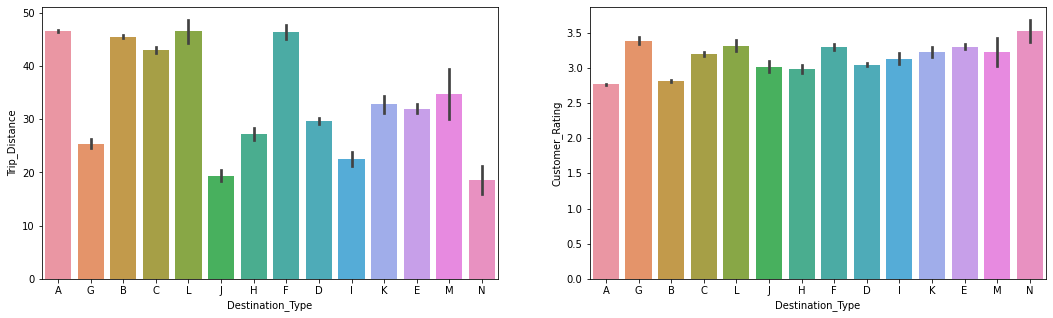

In [ ]:
fig,axes=plt.subplots(1,2,figsize=[18,5])
sns.barplot(data=df1_train,x='Destination_Type',y='Trip_Distance',ax=axes[0])
sns.barplot(data=df1_train,x='Destination_Type',y='Customer_Rating',ax=axes[1])
plt.show()


***Inference***

* For Destination_type "N" "G" "J" "H" "I" Distance travelled by the customer  is short around 25 km.
* We can see for the short_distance trip customer ratig is high 3.5.
* For Destination_type "A" "B"  Distance travelled by the customer  is short around 45 km.
* We can see for the long_distance trip customer ratig is low around 2.8.



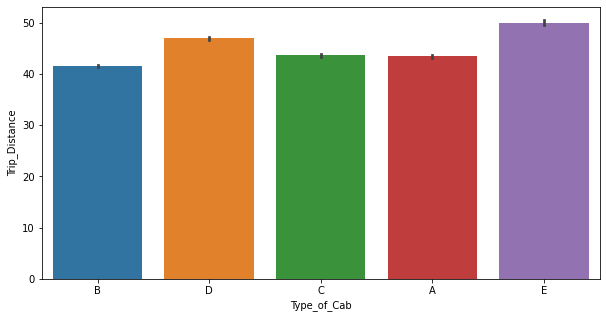

In [ ]:
sns.barplot(data=df1_train,x='Type_of_Cab',y='Trip_Distance')

***Inference***

* Customers travelled more on cab "E" which is almost 50

***Numeric_columns and surge_pricing_type***

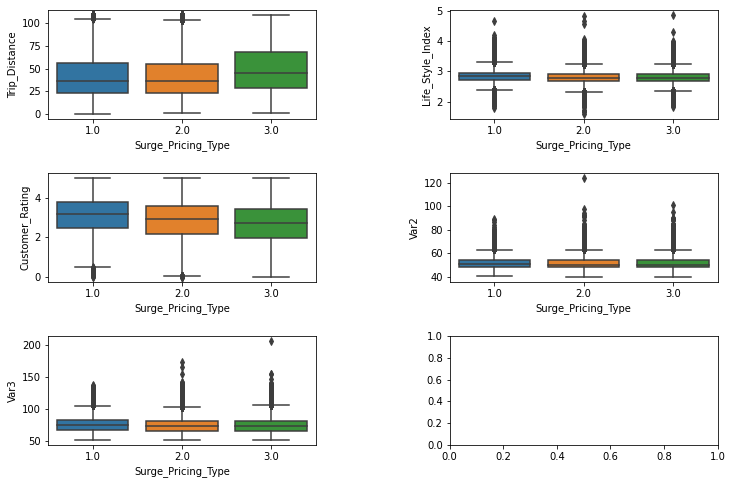

In [ ]:
num_col=["Trip_Distance","Life_Style_Index","Customer_Rating","Var2","Var3"]
fig,axes=plt.subplots(3,2,figsize=[12,8])
sns.boxplot(x="Surge_Pricing_Type",y=num_col[0],data=df1_train,ax=axes[0,0])
sns.boxplot(x="Surge_Pricing_Type",y=num_col[1],data=df1_train,ax=axes[0,1])
sns.boxplot(x="Surge_Pricing_Type",y=num_col[2],data=df1_train,ax=axes[1,0])
sns.boxplot(x="Surge_Pricing_Type",y=num_col[3],data=df1_train,ax=axes[1,1])
sns.boxplot(x="Surge_Pricing_Type",y=num_col[4],data=df1_train,ax=axes[2,0])
plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.show()

***Inference***

1.Trip_Distance
* If the trip_distance median is around 35 then pricing is around "1" and "2"
* If the trip_distance median is around 45 then pricing is around "3"

2.Life_Style_Index
* If Life_Style_Index median is 2.8 then pricing type will be "1","2","3".

3.Customer_rating
* If the customer_rating is "above 3" then the pricing type will be "1".
* If the customer_rating is "cloase to 3" then the pricing type will be "2" and "3"

***Descriptive Statistics***



In [ ]:
df1_train.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Surge_Pricing_Type
count,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,5.987908,2.802066,2.849458,0.782838,51.202800,75.099019,2.155747
std,25.522882,3.548375,0.207959,0.980675,1.037559,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.687952,2.152500,0.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.791163,2.895000,0.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.912815,3.582500,1.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,124.000000,206.000000,3.000000


***Inference***

* Min_Trip_Distance is 0.31 and max_trip_distance is 109
* Average_Trip_distance is 38
* Average_customer_rating is 2.8
* Average_life_style_index is 2.7
* Most of the customer prefer surge_pricing_type 2

In [ ]:
df1_train.corr()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Surge_Pricing_Type
Trip_Distance,1.000000,0.117418,0.466782,-0.054654,-0.007686,0.200456,0.231706,0.135928
Customer_Since_Months,0.117418,1.000000,0.124007,-0.048644,-0.004823,0.043592,0.111236,0.032155
Life_Style_Index,0.466782,0.124007,1.000000,0.191597,0.065897,0.215803,0.303803,-0.086993
Customer_Rating,-0.054654,-0.048644,0.191597,1.000000,0.003595,-0.302968,-0.227531,-0.155279
Cancellation_Last_1Month,-0.007686,-0.004823,0.065897,0.003595,1.000000,0.095830,0.128686,0.185646
Var2,0.200456,0.043592,0.215803,-0.302968,0.095830,1.000000,0.683437,0.003437
Var3,0.231706,0.111236,0.303803,-0.227531,0.128686,0.683437,1.000000,-0.039309
Surge_Pricing_Type,0.135928,0.032155,-0.086993,-0.155279,0.185646,0.003437,-0.039309,1.000000


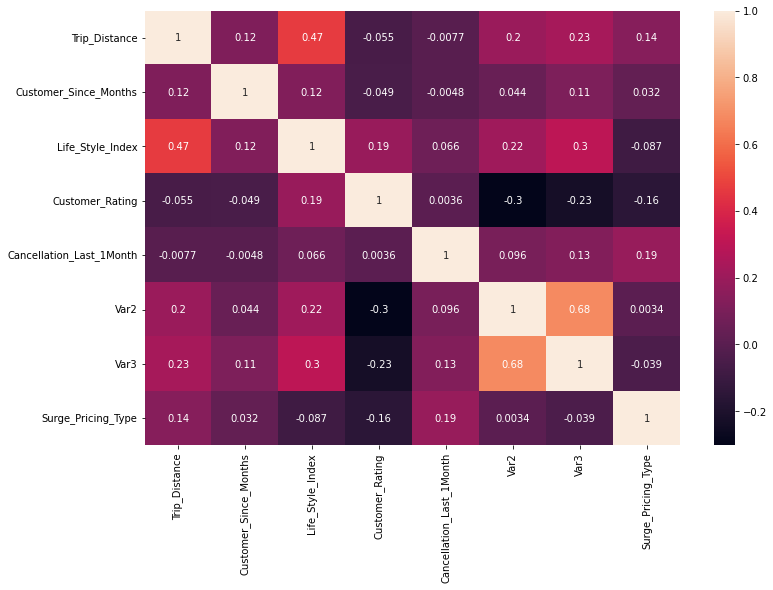

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df1_train.corr(),annot=True)
plt.show()

***Inference***

* No strong correlation between any of the variables and target 
* All the variables has unique information

***Multicollinearity -Variance inflation factor***

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [ ]:
num_features.shape

(131662, 8)

In [ ]:
for ind in range(len(num_features.columns)):
  vif=pd.DataFrame()
  vif["VIF_FACTOR"]=[VIF(num_features.values,i) for i in range(num_features.shape[1])]
  vif["FEATURES"]=num_features.columns
  multi=vif[vif["VIF_FACTOR"]>10]


  if multi.empty==False:
    df_sorted=multi.sort_values(by="VIF_FACTOR",ascending=False)
    print(df_sorted)
  else:
    print(vif)
    break

  if df_sorted.empty==False:
    num_features=num_features.drop(df_sorted["FEATURES"].iloc[0],axis=1)
  else:
    print(vif)
    print(" ")

   VIF_FACTOR                  FEATURES
0    3.873233             Trip_Distance
1    3.524901     Customer_Since_Months
2    5.091494           Customer_Rating
3    1.627288  Cancellation_Last_1Month
4    6.493273        Surge_Pricing_Type


***Inference***

* Life_Style_Index,Var2,Var3 is having multicollinearity in the data.


In [ ]:
num_features.columns

Index(['Trip_Distance', 'Customer_Since_Months', 'Customer_Rating',
       'Cancellation_Last_1Month', 'Surge_Pricing_Type'],
      dtype='object')

In [ ]:
df1_train.index.is_unique

False

In [ ]:
df1_train.head()

,Type_of_Cab,Confidence_Life_Style_Index,Destination_Type,Gender,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Surge_Pricing_Type
0,B,B,A,Female,31.16,5,2.69170,2.14750,0,53.0,90.0,1.0
1,D,B,G,Male,14.12,3,2.97795,4.93375,0,47.0,64.0,1.0
2,C,C,A,Male,72.54,0,3.06236,2.08250,0,52.0,89.0,1.0
3,B,A,A,Male,16.78,1,2.70013,1.61250,3,52.0,85.0,1.0
4,A,B,A,Male,18.47,9,2.77751,1.44000,5,55.0,85.0,1.0


In [ ]:
df1_train.index.duplicated()

array([False, False, False, ...,  True,  True,  True])

In [ ]:
df1_train[df1_train.index.duplicated()]

In [ ]:
df2=df1_train.loc[~df1_train.index.duplicated(), :]

In [ ]:
df2.shape

In [ ]:
sns.pairplot(df2,vars=["Trip_Distance","Customer_Since_Months","Life_Style_Index",
                        "Customer_Rating","Cancellation_Last_1Month","Var2","Var3"],hue="Surge_Pricing_Type")

![picture](https://drive.google.com/uc?export=view&id=1ySuJq7CjVkPTbliDBK4NeTDQruHxitZH)

![picture](https://drive.google.com/uc?export=view&id=1spg7GPkDW6CCTehkhNisLAIBW3rzNY8W)



# **ENCODING THE CATEGORICAL VALUES** -  *LABEL ENCODING*

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
LE=LabelEncoder()

for i in df1_train[["Type_of_Cab","Confidence_Life_Style_Index","Destination_Type","Gender"]]:
  df1_train[i]=LE.fit_transform(df1_train[i])

In [ ]:
df1_train.head()

In [ ]:
df1_train.info()

# **SCALING** -*MIN MAX SCALING*

---

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [ ]:
for i in df1_train.columns:
  if i!="Surge_Pricing_Type":
    mm=MinMaxScaler()
    df1_train[i] = mm.fit_transform(df1_train[[i]])


In [ ]:
df1_train.head()

# ***class imbalance check***

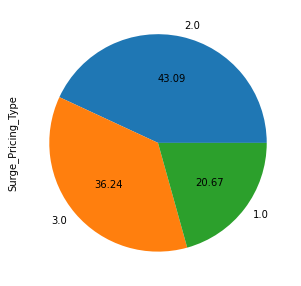

In [ ]:
df1_train["Surge_Pricing_Type"].value_counts(normalize=True).plot(kind="pie",autopct="%.2f")

 ***Visualization using plots \
 variance between group and within group***

# **Feature selection**

***Statistical Test***

---

In [ ]:
import scipy.stats as stats

**CHISQURE TEST OF INDEPENDENCE** - CATEGORICAL VARIABLE AND CATEGORICAL VARIABLE

---



In [ ]:
columns=[]
pvalue=[]
significance=[]

for i in cat_features.columns:
  columns.append(i)
  obs=pd.crosstab(df1_train["Surge_Pricing_Type"],df1_train[i])
  chi_stat,pval,df,expected=stats.chi2_contingency(obs)
  pvalue.append(pval)
  if(pval>0.05):
    significance.append('Not Significant')
  else:
    significance.append('Significant')

pd.DataFrame({"COLUMNS":columns,"PVALUES":pvalue,"SIGNIFICANCE":significance})

***Inference***
* 95% confidence level
* Pval>0.05
* Ha is accepted (Significant)
* TYPE OF CAB ,CONFIDENCE_LIFE_STYLE_INDEX,DESTINATION TYPE ARE SIGNIFICANT WITH TARGET SURGE_TYPE_PRICING
* GENDER IS NOT SIGNIFICANT

**ANOVA TEST** - CATEOGORY VARIABLE (MORE THAN 2) AND  Numerical variables

---


In [ ]:
columns=[]
pvalue=[]
significance=[]

for i in num_features.columns:
  columns.append(i)
  surge_1=df1_train[df1_train['Surge_Pricing_Type']==1][i]
  surge_2=df1_train[df1_train['Surge_Pricing_Type']==2][i]
  surge_3=df1_train[df1_train['Surge_Pricing_Type']==3][i]
 
  fstat,pval = stats.f_oneway(surge_1,surge_2,surge_3)
  pvalue.append(pval)
  if(pval>0.05):
    significance.append('Not Significant')
  else:
    significance.append('Significant')

pd.DataFrame({"COLUMNS":columns,"PVALUES":pvalue,"SIGNIFICANCE":significance})
  

***Inference***
* 95% confidence level
* Pval>0.05
* Ha is accepted (Significant)
* TRIP_DISTANCE,CUSTOMER_SINCE_MONTHS,CUSTOMER_RATING,CANCELLATION_LAST1MONTH ARE SIGNIFICANT WITH TARGET SURGE_TYPE_PRICING


***Inference***

* CLASS IS BALANCED 

In [ ]:
surge_1=df1_train[df1_train['Surge_Pricing_Type']==1]["Life_Style_Index"]
surge_2=df1_train[df1_train['Surge_Pricing_Type']==2]["Life_Style_Index"]
surge_3=df1_train[df1_train['Surge_Pricing_Type']==3]["Life_Style_Index"]

sns.distplot(surge_1)
sns.distplot(surge_2)
sns.distplot(surge_3)
plt.show()

In [ ]:
surge_1=df1_train[df1_train['Surge_Pricing_Type']==1]["Var3"]
surge_2=df1_train[df1_train['Surge_Pricing_Type']==2]["Var3"]
surge_3=df1_train[df1_train['Surge_Pricing_Type']==3]["Var3"]

sns.distplot(surge_1)
sns.distplot(surge_2)
sns.distplot(surge_3)
plt.show()

**We can see from Plot that within the group and between the group means are almost equal.There is an overlap it is diffcult to predict by means of linear models. so we are going for tree based models.** ***bold text***

# **MODEL BUILDING**

In [ ]:
x = df1_train.drop(columns = ['Surge_Pricing_Type'])
y = df1_train["Surge_Pricing_Type"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size = 0.7,random_state = 7)

# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
import sklearn.metrics as metrics

In [ ]:
lr = LogisticRegression()
base = lr.fit(xtrain,ytrain)
ypred = base.predict(xtest)

ValueError: ignored

In [ ]:
ypred_train= base.predict(xtrain)

In [ ]:
confusion_matrix(ytest,ypred)

array([[ 5225,  2332,   562],
       [  754, 13241,  3082],
       [  740,  3490, 10073]])

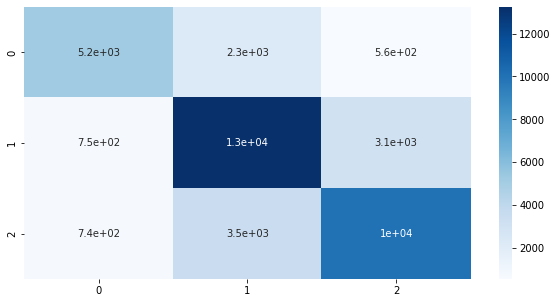

In [ ]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,cmap="Blues")
plt.show()

In [ ]:
print(metrics.classification_report(ytrain,ypred_train))

              precision    recall  f1-score   support

         1.0       0.78      0.63      0.70     19095
         2.0       0.70      0.78      0.73     39651
         3.0       0.73      0.71      0.72     33417

    accuracy                           0.72     92163
   macro avg       0.74      0.71      0.72     92163
weighted avg       0.73      0.72      0.72     92163



In [ ]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

         1.0       0.78      0.64      0.70      8119
         2.0       0.69      0.78      0.73     17077
         3.0       0.73      0.70      0.72     14303

    accuracy                           0.72     39499
   macro avg       0.74      0.71      0.72     39499
weighted avg       0.73      0.72      0.72     39499



# Logistic regression models struggles because it is a non linear model linear model find its difficult to predict.

# RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
model_v1 = rf.fit(xtrain,ytrain)
ypred = model_v1.predict(xtest)

In [ ]:
ypred_train= model_v1.predict(xtrain)

In [ ]:
confusion_matrix(ytest,ypred)

array([[ 5880,  1598,   641],
       [  544, 14687,  1846],
       [  765,  2559, 10979]])

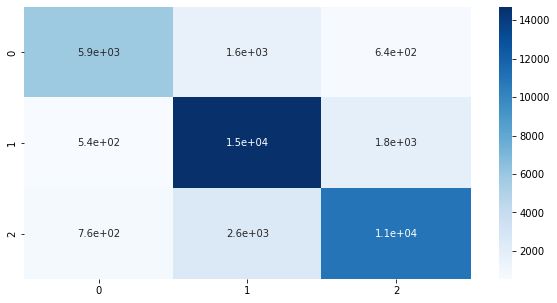

In [ ]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,cmap="Blues")
plt.show()

In [ ]:
print(metrics.classification_report(ytrain,ypred_train))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     19095
         2.0       1.00      1.00      1.00     39651
         3.0       1.00      1.00      1.00     33417

    accuracy                           1.00     92163
   macro avg       1.00      1.00      1.00     92163
weighted avg       1.00      1.00      1.00     92163



In [ ]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

         1.0       0.82      0.72      0.77      8119
         2.0       0.78      0.86      0.82     17077
         3.0       0.82      0.77      0.79     14303

    accuracy                           0.80     39499
   macro avg       0.80      0.78      0.79     39499
weighted avg       0.80      0.80      0.80     39499



# Knearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
base = knn.fit(xtrain,ytrain)
ypred = base.predict(xtest)

In [ ]:
ypred_train=base.predict(xtrain)

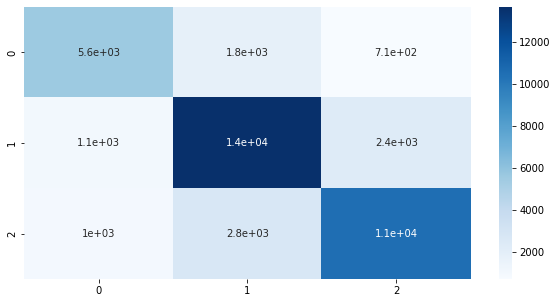

In [ ]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,cmap="Blues")
plt.show()

In [ ]:
print(metrics.classification_report(ytrain,ypred_train))

              precision    recall  f1-score   support

         1.0       0.79      0.73      0.76     19095
         2.0       0.79      0.85      0.82     39651
         3.0       0.84      0.80      0.82     33417

    accuracy                           0.81     92163
   macro avg       0.81      0.79      0.80     92163
weighted avg       0.81      0.81      0.81     92163



In [ ]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

         1.0       0.73      0.69      0.71      8119
         2.0       0.75      0.80      0.77     17077
         3.0       0.77      0.74      0.75     14303

    accuracy                           0.75     39499
   macro avg       0.75      0.74      0.74     39499
weighted avg       0.75      0.75      0.75     39499



In [ ]:
# test accuracy is poor in Knn due to effect of outliers.

# Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(max_depth=5)
model_v6 = dt.fit(xtrain,ytrain)
ypred = model_v6.predict(xtest)

In [ ]:
ypred_train=model_v6.predict(xtrain)

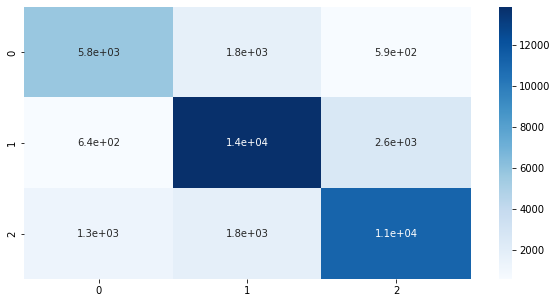

In [ ]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,cmap="Blues")
plt.show()

In [ ]:
print(metrics.classification_report(ytrain,ypred_train))

              precision    recall  f1-score   support

         1.0       0.75      0.71      0.73     19095
         2.0       0.79      0.81      0.80     39651
         3.0       0.78      0.78      0.78     33417

    accuracy                           0.78     92163
   macro avg       0.77      0.77      0.77     92163
weighted avg       0.78      0.78      0.78     92163



In [ ]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

         1.0       0.75      0.71      0.73      8119
         2.0       0.80      0.81      0.80     17077
         3.0       0.78      0.78      0.78     14303

    accuracy                           0.78     39499
   macro avg       0.77      0.77      0.77     39499
weighted avg       0.78      0.78      0.78     39499



In [ ]:
# The class weight is imbalanced , hence we are proceeding with smote over sampling technique

# Main Model Building

Description:
As we move forward , we are mainly focusing on the metric f1-weighted and ways to improve it. The main reason for choosing this metric is because this is the weighted variant of f1-score which is the combination precision and recall which makes the score stable and reliable. We will do two main techniques to improve the f1-weighted score -  GridSearchCV and Cross-Validation

**Base Model (KNN)**

In [ ]:
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
base_model = knn.fit(xtrain,ytrain)
ypred = base_model.predict(xtest)

In [ ]:
confusion_matrix(ytest,ypred)

array([[ 3802,  2658,   741],
       [ 2501, 10613,  1755],
       [ 1987,  3114,  6550]])

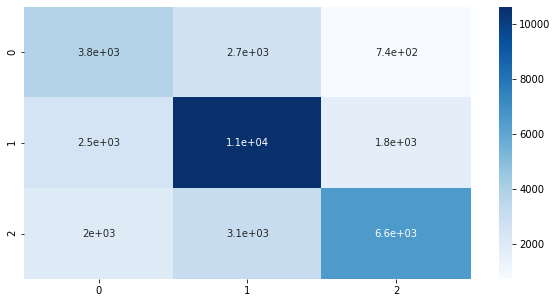

In [ ]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,cmap="Blues")

In [ ]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

         1.0       0.46      0.53      0.49      7201
         2.0       0.65      0.71      0.68     14869
         3.0       0.72      0.56      0.63     11651

    accuracy                           0.62     33721
   macro avg       0.61      0.60      0.60     33721
weighted avg       0.63      0.62      0.62     33721



In [ ]:
kf = KFold(n_splits=5,shuffle=True,random_state=7)
scores = cross_val_score(estimator=knn,X=x,y=y,scoring='f1_weighted',cv=kf)
score_knn = np.mean(scores)
bias_knn = 1-np.mean(score_knn)
var_knn = np.std(score_knn)/np.mean(score_knn)

print('Average f1-weighted score = ',np.mean(score_knn))
print('Bias error(in %) = ',bias_knn * 100 , '%')
print('Variance error(in %) = ',var_knn * 100,'%')

Average f1-weighted score =  0.7491425413096751
Bias error(in %) =  25.085745869032493 %
Variance error(in %) =  0.0 %


# Standalone model - 1  Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
kf = KFold(n_splits=5,shuffle=True,random_state=7)
scores = cross_val_score(estimator=dt,X=x,y=y,scoring='f1_weighted',cv=kf)
score_dt = np.mean(scores)
bias_dt = 1-np.mean(score_dt)
var_dt = np.std(score_dt)/np.mean(score_dt)

print('Average f1-weighted score = ',np.mean(score_dt))
print('Bias error(in %) = ',bias_dt * 100 , '%')
print('Variance error(in %) = ',var_dt * 100,'%')

Average f1-weighted score =  0.7135922039590084
Bias error(in %) =  28.640779604099166 %
Variance error(in %) =  0.0 %


# Ensemble Model - 1 Random Forest 

In [ ]:
rf = RandomForestClassifier()
kf = KFold(n_splits=5,shuffle=True,random_state=7)
scores = cross_val_score(estimator=rf,X=x,y=y,scoring='f1_weighted',cv=kf)
score_rf = np.mean(scores)
bias_rf = 1-np.mean(score_rf)
var_rf = np.std(score_rf)/np.mean(score_rf)

print('Average f1-weighted score = ',np.mean(score_rf))
print('Bias error(in %) = ',bias_rf * 100 , '%')
print('Variance error(in %) = ',var_rf * 100,'%')

Average f1-weighted score =  0.8037827341172183
Bias error(in %) =  19.621726588278165 %
Variance error(in %) =  0.0 %


# Ensemble Model - 2 AdaBoosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada = AdaBoostClassifier()
kf = KFold(n_splits=5,shuffle=True,random_state=7)
scores = cross_val_score(estimator=ada,X=x,y=y,scoring='f1_weighted',cv=kf)
score_ada = np.mean(scores)
bias_ada = 1-np.mean(score_ada)
var_ada = np.std(score_ada)/np.mean(score_ada)

print('Average f1-weighted score = ',np.mean(score_ada))
print('Bias error(in %) = ',bias_ada * 100 , '%')
print('Variance error(in %) = ',var_ada * 100,'%')

Average f1-weighted score =  0.786245108479534
Bias error(in %) =  21.3754891520466 %
Variance error(in %) =  0.0 %


# Ensemble Model - 3 XGBoost

In [ ]:
xgb = XGBClassifier()
kf = KFold(n_splits=5,shuffle=True,random_state=7)
scores = cross_val_score(estimator=xgb,X=x,y=y,scoring='f1_weighted',cv=kf)
score_xgb = np.mean(scores)
bias_xgb = 1-np.mean(score_xgb)
var_xgb = np.std(score_xgb)/np.mean(score_xgb)

print('Average f1-weighted score = ',np.mean(score_xgb))
print('Bias error(in %) = ',bias_xgb * 100 , '%')
print('Variance error(in %) = ',var_xgb * 100,'%')

Average f1-weighted score =  0.8010246573656294
Bias error(in %) =  19.897534263437056 %
Variance error(in %) =  0.0 %


# Collecting the results for the models we done so far

In [ ]:
res = pd.DataFrame({'Models':['KNN','DecisionTree','RandomForest','AdaBoosting','XGBoost'],
                    'F1-Weighted':[score_knn,score_dt,score_rf,score_ada,score_xgb],
                    'Bias Error':[bias_knn,bias_dt,bias_rf,bias_ada,bias_xgb],
                    'Variance Error':[var_knn,var_dt,var_rf,var_ada,var_xgb]})

In [ ]:
res

,Models,F1-Weighted,Bias Error,Variance Error
0,KNN,0.749143,0.250857,0.0
1,DecisionTree,0.713592,0.286408,0.0
2,RandomForest,0.803783,0.196217,0.0
3,AdaBoosting,0.786245,0.213755,0.0
4,XGBoost,0.801025,0.198975,0.0


# Stacking and Bagging models

Description :

We will stacking 3 of the best models and find out the f1_weighted score and then out of that we will do bagging of the single best model

In [ ]:
from sklearn.ensemble import StackingClassifier,BaggingClassifier

In [ ]:
est = [('RandomForest',rf),('AdaBoost',ada),('XGBoost',xgb)]
stack = StackingClassifier(estimators=est,final_estimator = xgb,cv = 5)
kf = KFold(n_splits=5,shuffle=True,random_state=7)
scores = cross_val_score(estimator=stack,X=x,y=y,scoring='f1_weighted',cv=kf)
score_stack = np.mean(scores)
bias_stack = 1-np.mean(score_stack)
var_stack = np.std(score_stack)/np.mean(score_stack)

print('Average f1-weighted score = ',np.mean(score_stack))
print('Bias error(in %) = ',bias_stack * 100 , '%')
print('Variance error(in %) = ',var_stack * 100,'%')

Average f1-weighted score =  0.8067074633685383
Bias error(in %) =  19.329253663146172 %
Variance error(in %) =  0.0 %


In [ ]:
bag = BaggingClassifier(base_estimator=stack)
bag = StackingClassifier(estimators=est,final_estimator = xgb,cv = 5)
kf = KFold(n_splits=5,shuffle=True,random_state=7)
scores = cross_val_score(estimator=bag,X=x,y=y,scoring='f1_weighted',cv=kf)
score_bag = np.mean(scores)
bias_bag = 1-np.mean(score_bag)
var_bag = np.std(score_bag)/np.mean(score_bag)

print('Average f1-weighted score = ',np.mean(scores))
print('Bias error(in %) = ',bias_bag * 100 , '%')
print('Variance error(in %) = ',var_bag * 100,'%')

Average f1-weighted score =  0.8066626879618257
Bias error(in %) =  19.33373120381743 %
Variance error(in %) =  0.0 %


# Final summary of the data

In [ ]:
final_res = pd.DataFrame({'Models':['KNN','DecisionTree','RandomForest','AdaBoosting','XGBoost','Stacking','Bagging'],
                    'F1-Weighted':[score_knn,score_dt,score_rf,score_ada,score_xgb,score_stack,score_bag],
                    'Bias Error':[bias_knn,bias_dt,bias_rf,bias_ada,bias_xgb,bias_stack,bias_bag],
                    'Variance Error':[var_knn,var_dt,var_rf,var_ada,var_xgb,var_stack,var_bag]})

In [ ]:
final_res.sort_values('F1-Weighted',ascending=False)

,Models,F1-Weighted,Bias Error,Variance Error
5,Stacking,0.806707,0.193293,0.0
6,Bagging,0.806663,0.193337,0.0
2,RandomForest,0.803783,0.196217,0.0
4,XGBoost,0.801025,0.198975,0.0
3,AdaBoosting,0.786245,0.213755,0.0
0,KNN,0.749143,0.250857,0.0
1,DecisionTree,0.713592,0.286408,0.0


In [ ]:
# Stacking Classifier is the best performing model , but as stacking bagging is based on random forest , 
# we are doing gridsearch hyperparameter tuning on random forest

In [ ]:
from sklearn.model_selection import GridSearchCV

# Final model using GridSearchCV

In [ ]:
rf = RandomForestClassifier()
params = ({'n_estimators': np.arange(100,200,25),
           'max_depth':np.arange(5,22,2),
           'criterion':['gini','entropy']})
kf = KFold(n_splits=3,shuffle=True,random_state=7)
grid = GridSearchCV(estimator=rf,param_grid=params,scoring='f1_weighted',cv=kf,n_jobs=-1)
grid.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=KFold(n_splits=3, random_state=7, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fra...n_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=

In [ ]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 21, 'n_estimators': 150}

In [ ]:
rf = RandomForestClassifier(criterion='entropy',max_depth=21,n_estimators=150)
kf = KFold(n_splits=5,shuffle=True,random_state=7)
scores = cross_val_score(estimator=rf,X=x,y=y,scoring='f1_weighted',cv=kf)
score_final = np.mean(scores)
bias_final = 1-np.mean(score_final)
var_final = np.std(score_final)/np.mean(score_final)

print('Average f1-weighted score = ',np.mean(scores))
print('Bias error(in %) = ',bias_final * 100 , '%')
print('Variance error(in %) = ',var_final * 100,'%')

Average f1-weighted score =  0.8043249935537643
Bias error(in %) =  19.56750064462357 %
Variance error(in %) =  0.0 %


**Model Deployment is given as per attachment of file we have done deployment using Flask and HTML,CSS.**